# Figure 7.

Meridional average of vertically integrated divergence of (solid) MSE
flux and its (dashed) dry and (dotted) latent parts
($\nabla\cdot\left(\vec u h \right)$, $W~m^{-2}$) in the (a) Trappist-1e case and
(b) Proxima b case in (blue) *MassFlux*, (orange) *Adjust*, and (green)
*NoCnvPm* simulations.

[Skip code and jump to the figure](#Show-the-figure)

----------------------------------

Import the necessary libraries.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from aeolus.calc import last_year_mean
from aeolus.coord_utils import UM_LATLON
from aeolus.core import Run
from aeolus.util import fmt_lonlat, subplot_label_generator

In [4]:
from commons import (
    GLM_MODEL_TIMESTEP,
    PLANET_ALIASES,
    RUN_ALIASES,
    OUTPUT_NAME_PREFIX,
)
from gl_diag import (
    calc_derived_cubes,
    mse_hdiv_mmean,
)
import mypaths
from plot_func import MARKER_KW, add_custom_legend, use_style

Global stylesheet for figures.

In [5]:
use_style()

## Load data

Create a dictionary of `Run` objects with preprocessed data.

In [6]:
runs = {}
for planet in PLANET_ALIASES.keys():
    for run_key in RUN_ALIASES.keys():
        label = f"{planet}_{run_key}"

        fname = mypaths.sadir / label / "_processed" / f"{label}.nc"

        runs[label] = Run(
            files=fname,
            name=label,
            planet=planet,
            timestep=GLM_MODEL_TIMESTEP,
            processed=True,
        )

        # Calculate additional diagnostics
        runs[label].add_data(calc_derived_cubes)

## Calculate the meridional mean of vertically integrated divergence of the MSE flux

Loop over planets and runs

In [7]:
results = {}
for planet in PLANET_ALIASES.keys():
    for run_key in RUN_ALIASES.keys():
        label = f"{planet}_{run_key}"
        results[label] = mse_hdiv_mmean(runs[label].proc)

## Plot the results

In [8]:
curve_plt_kw = {
    "mse": dict(linestyle="-"),
    "dse": dict(linestyle="--"),
    "lse": dict(linestyle=":"),
}

ttl_kw = dict(fontsize="small", pad=5, loc="left")

lon_ticks = np.arange(-180, 181, 90)

In [9]:
# Number of columns and rows
ncol = len(PLANET_ALIASES)
nrow = 1
# Axes limits
xlim = [-180, 180]
ylim = [-300, 500]

fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(8 * ncol, 4 * nrow))

iletters = subplot_label_generator()
for i, (planet, ax) in enumerate(zip(PLANET_ALIASES, axs.T)):
    ax.set_title(f"({next(iletters)})", **ttl_kw)
    ax.set_title(PLANET_ALIASES[planet], fontsize="large", pad=5, loc="center")

    ax.vlines(0.0, *ylim, linestyle="-", linewidth=0.5, alpha=0.5)
    ax.set_xlim(xlim)
    ax.set_xticks(lon_ticks)
    ax.set_xticklabels([fmt_lonlat(i, "lon", True) for i in lon_ticks])
    ax.set_ylim(ylim)
    ax.hlines(0.0, *xlim, linestyle="-", linewidth=0.5, alpha=0.5)
    if ax.is_last_row():
        ax.set_xlabel(f"{UM_LATLON[1].capitalize()} " + r"[$\degree$]")
    if ax.is_first_col():
        ax.set_ylabel(
            r"MSE flux divergence [$W$ $m^{-2}$]"
        )  #  $\nabla\cdot \langle\overline{\vec{v} h}\rangle$

    for run_key in RUN_ALIASES.keys():
        label = f"{planet}_{run_key}"

        mse_cmpnts = results[label]
        for cmpnt_key, compnt in mse_cmpnts.items():
            lons = compnt.coord(UM_LATLON[1]).points
            ax.plot(lons, compnt.data, **MARKER_KW[run_key], **curve_plt_kw[cmpnt_key])

# Create two legends, for planets and runs, respectively
add_custom_legend(
    axs.flatten()[0],
    {v: dict(linestyle="-", **MARKER_KW[k]) for k, v in RUN_ALIASES.items()},
    loc=2,
    title="Simulations",
)

add_custom_legend(
    axs.flatten()[0],
    {k.upper(): dict(color="k", **curve_plt_kw[k]) for k in ["mse", "dse", "lse"]},
    loc=1,
    title="Components",
)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.close()  # Show the figure in a separate cell

## Show the figure

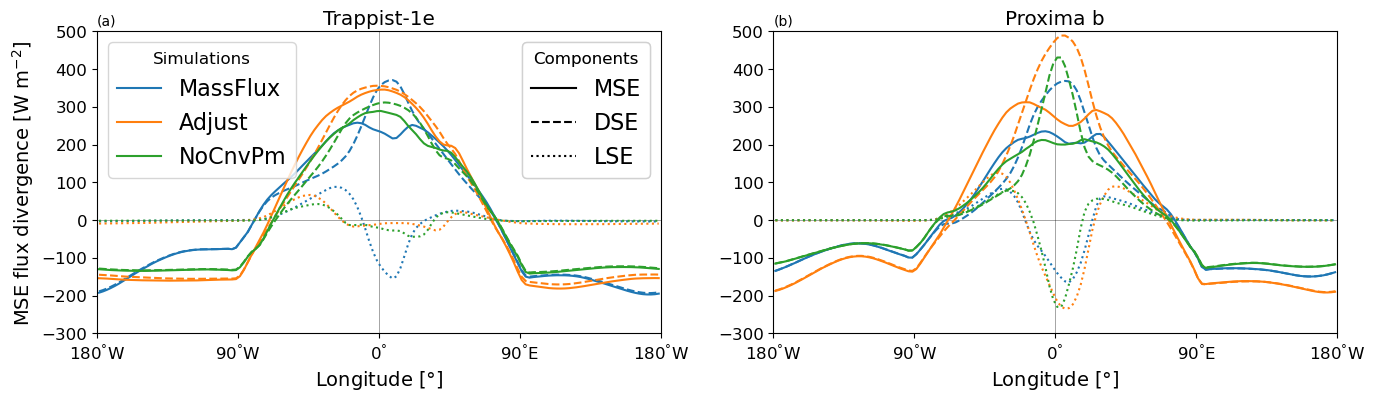

In [10]:
fig

And save it.

In [11]:
imgname = mypaths.plotdir / f"{OUTPUT_NAME_PREFIX}__mse_div_merid_mean.png"

In [12]:
fig.savefig(imgname, dpi=200)
print(f"Saved to ../{imgname.relative_to(mypaths.topdir)}")

Saved to ../plots/trap1e_proxb__grcs_llcs_all_rain_acoff__mse_div_merid_mean.png
